# Movie Review Classification via Transfer Learning 

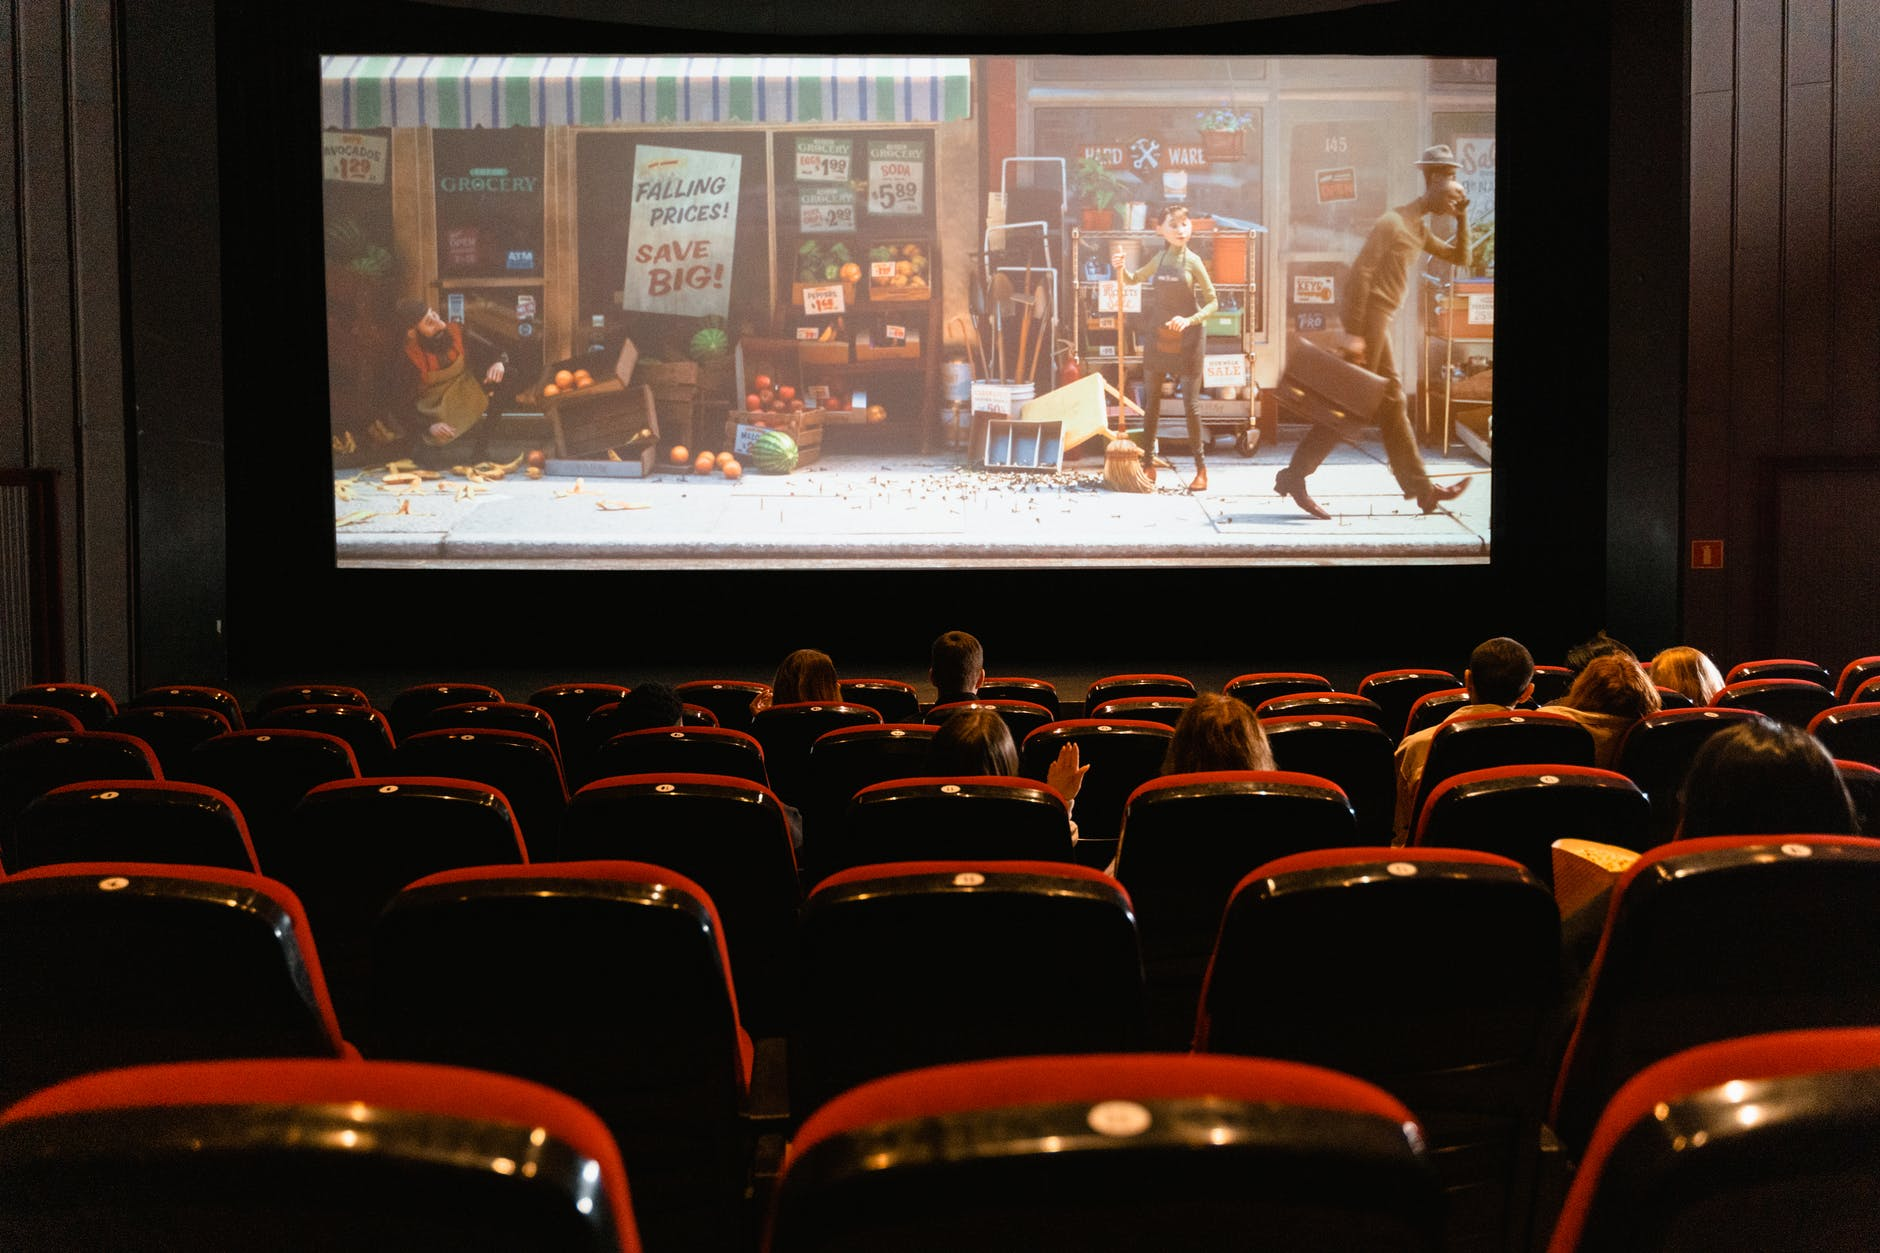

Here, based on the review we have two categories in which we have labeled them. One is positive and the other is negative.

Thus it is a problem of binary classification.

In [ ]:
pip install ktrain

     |████████████████████████████████| 25.3 MB 1.5 MB/s 
     |████████████████████████████████| 6.8 MB 21.4 MB/s 
     |████████████████████████████████| 981 kB 53.1 MB/s 
     |████████████████████████████████| 263 kB 50.3 MB/s 
     |████████████████████████████████| 2.8 MB 47.8 MB/s 
     |████████████████████████████████| 1.2 MB 49.0 MB/s 
     |████████████████████████████████| 468 kB 49.1 MB/s 
     |████████████████████████████████| 596 kB 42.9 MB/s 
     |████████████████████████████████| 895 kB 43.1 MB/s 
     |████████████████████████████████| 3.3 MB 47.7 MB/s 
     |████████████████████████████████| 67 kB 5.3 MB/s 
  Created wheel for ktrain: filename=ktrain-0.28.3-py3-none-any.whl size=25292656 sha256=7030c322b8097331b2b89e456989db0b822e9e146873d59a3b629b84f3bd12a6
  Stored in directory: /root/.cache/pip/wheels/6a/7e/c3/f46cdfc2b81c54424923b1405d7e670c35cacc11ada9a47b1c
  Created wheel for seqeval: filename=seqeval-0.0.19-py3-none-any.whl size=9931 sha256=397c9f2f11e57cab

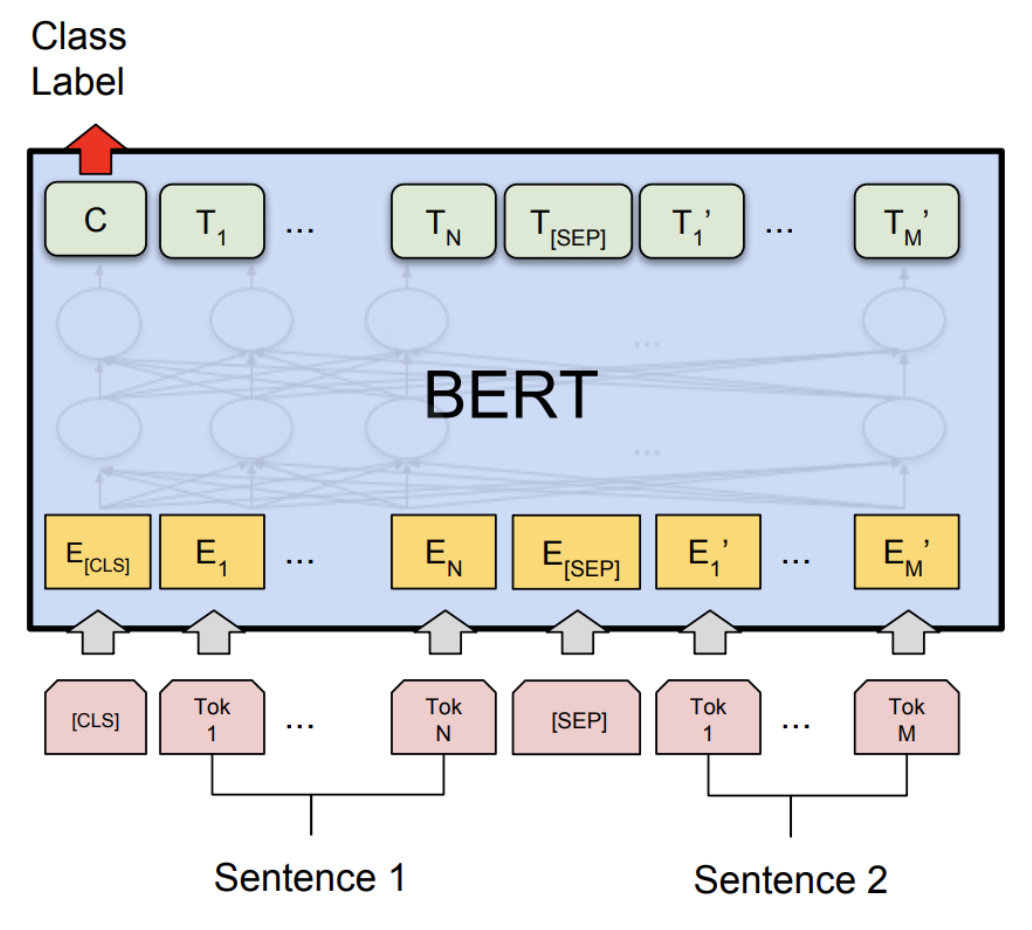

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf 
import ktrain 
from ktrain import text

In [ ]:
src_path=r'/content/gdrive/MyDrive/NLP/IMDB Dataset.csv'
data=pd.read_csv(src_path)
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS

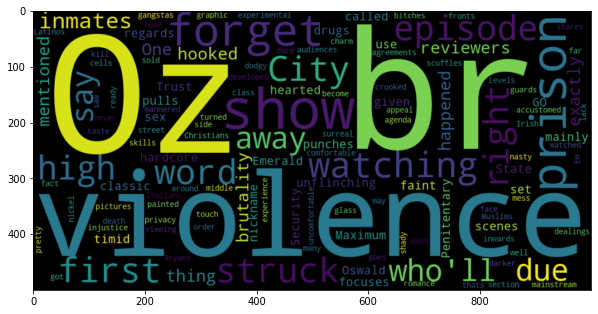

In [ ]:
plt.figure(figsize=(10,10))
reviews=str(data['review'][0])
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
words=WC.generate(reviews)
plt.imshow(words,interpolation='bilinear')
plt.show()

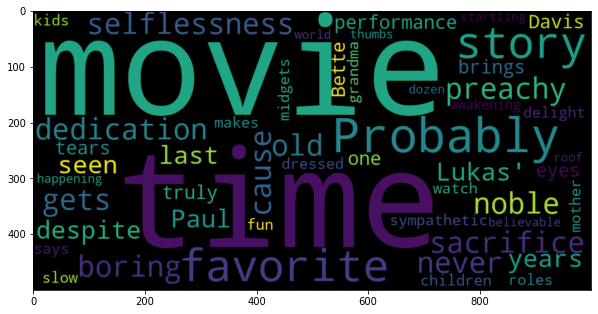

In [ ]:
plt.figure(figsize=(10,10))
reviews=str(data['review'][5])
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
words=WC.generate(reviews)
plt.imshow(words,interpolation='bilinear')
plt.show()

In [ ]:
data.shape

(50000, 2)

In [ ]:
#Splitting into train and test
t_data=data.iloc[:40000]
test_data=data.iloc[40000:]

In [ ]:
test_data

In [ ]:
#Splitting into train and validation
from sklearn.model_selection import train_test_split
train_data,val_data=train_test_split(t_data,test_size=0.1)

In [ ]:
train_data.shape

(36000, 2)

In [ ]:
val_data.shape

(4000, 2)

In [ ]:
test_data.shape

(10000, 2)

In [ ]:
#Obtaining train and test data
(X_train,Y_train),(X_test,Y_test),preprocess=text.texts_from_df(
    train_df=train_data,
    text_column='review',
    label_columns='sentiment',
    val_df=val_data,
    maxlen=400,
    preprocess_mode='bert'
)

['negative', 'positive']
       negative  positive
20363       1.0       0.0
17829       1.0       0.0
27239       0.0       1.0
11965       1.0       0.0
24653       1.0       0.0
['negative', 'positive']
       negative  positive
29872       1.0       0.0
36647       1.0       0.0
36495       0.0       1.0
4033        1.0       0.0
35276       1.0       0.0
preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [ ]:
#Loading the model
model=text.text_classifier(name='bert',
                           train_data=(X_train,Y_train),
                           preproc=preprocess
                           )

Is Multi-Label? False
maxlen is 400
done.


In [ ]:
learner=ktrain.get_learner(model=model,
                           train_data=(X_train,Y_train),
                           val_data=(X_test,Y_test),
                           batch_size=6)

In [ ]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input-Token (InputLayer)       [(None, 400)]        0           []                               
                                                                                                  
 Input-Segment (InputLayer)     [(None, 400)]        0           []                               
                                                                                                  
 Embedding-Token (TokenEmbeddin  [(None, 400, 768),  23440896    ['Input-Token[0][0]']            
 g)                              (30522, 768)]                                                    
                                                                                                  
 Embedding-Segment (Embedding)  (None, 400, 768)     1536        ['Input-Segment[0][0]']    

In [ ]:
#Starting to train  with 2 epochs and a learning rate of 2e-5
learner.fit_onecycle(lr=2e-5,epochs=2)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/2
4167/4167 [==============================] - 3529s 842ms/step - loss: 0.2642 - accuracy: 0.8923 - val_loss: 0.1243 - val_accuracy: 0.9546
Epoch 2/2
4167/4167 [==============================] - 3505s 841ms/step - loss: 0.1325 - accuracy: 0.9527 - val_loss: 0.0408 - val_accuracy: 0.9906


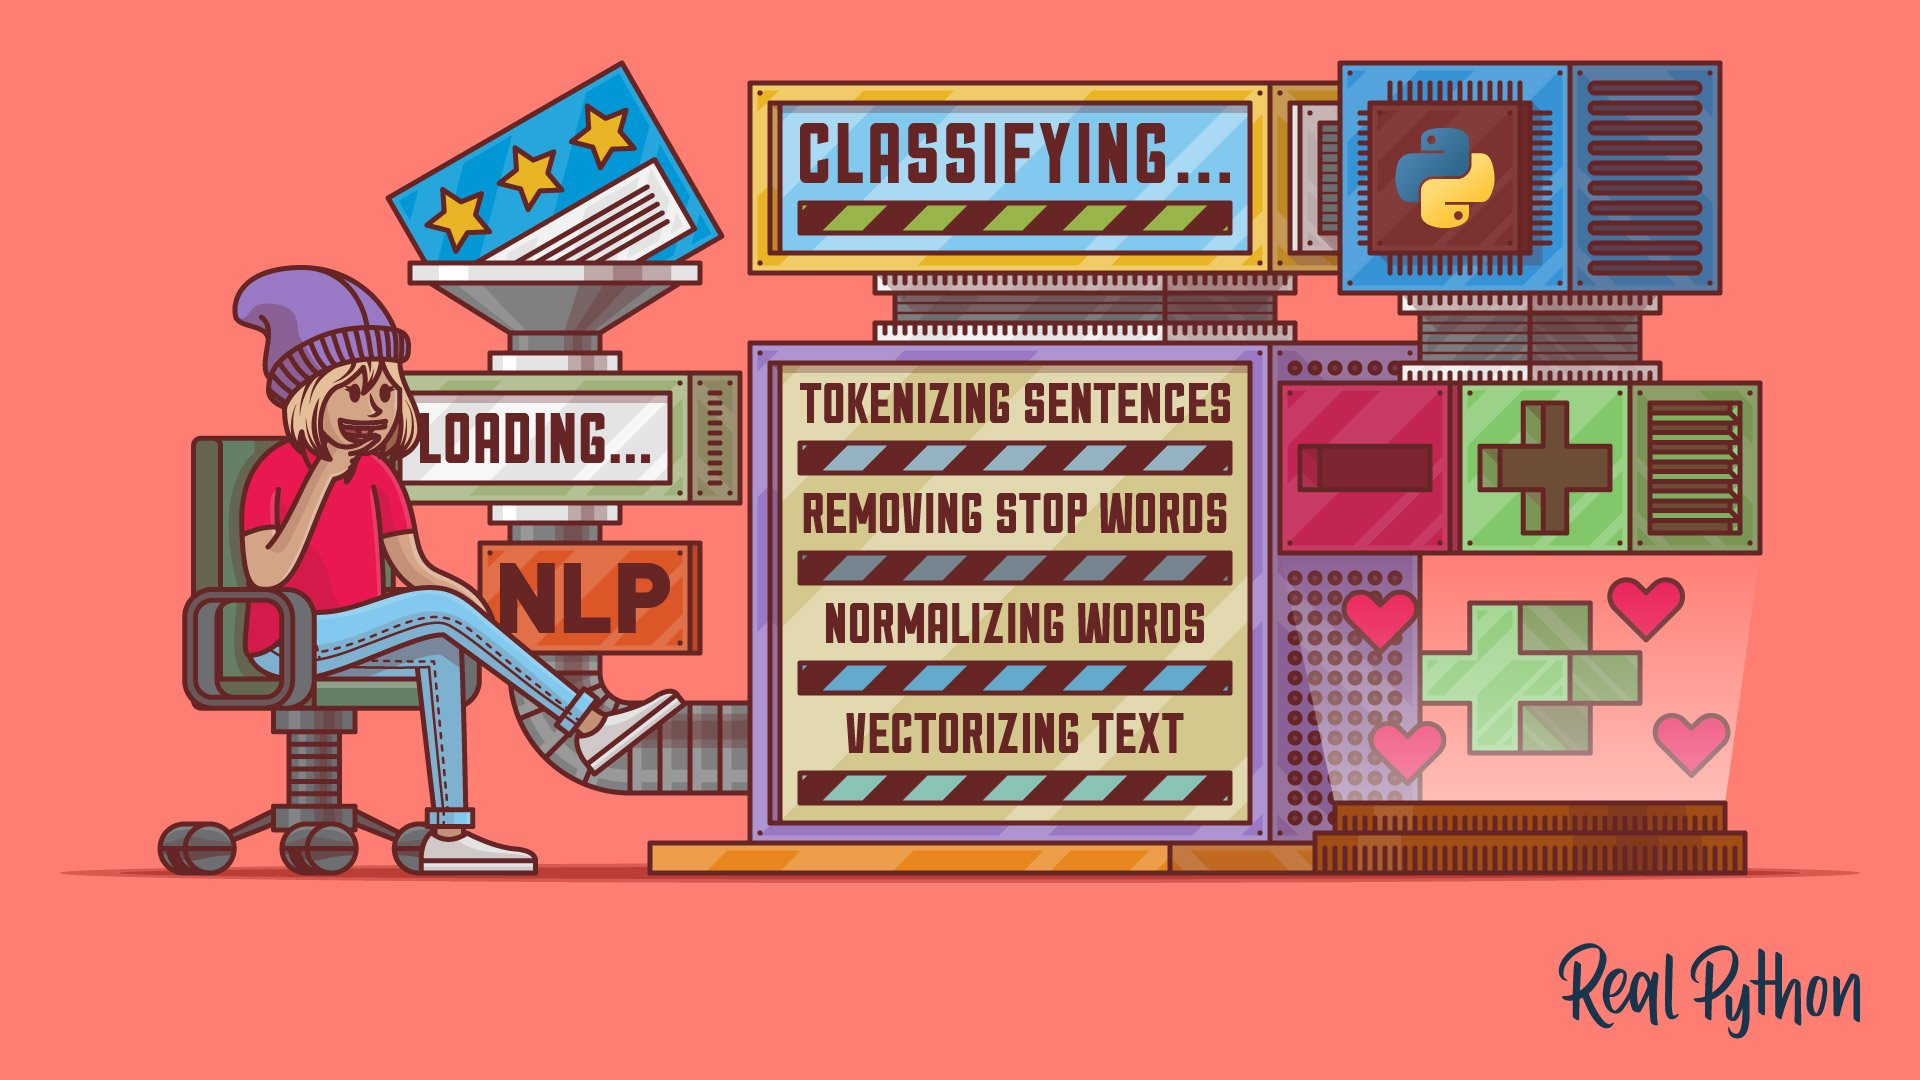

**Google's BERT model provides a validation accuracy of 99.06% which clearly out performs the  basic models like Logistic Regression, Support Vector Machines and Long Short Term Memory Networks(LSTM).**